In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy.optimize as opt

In [15]:
path = './data/exam_data.txt'
print(path)
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

./data/exam_data.txt


Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

Text(0, 0.5, 'Exam 2 Score')

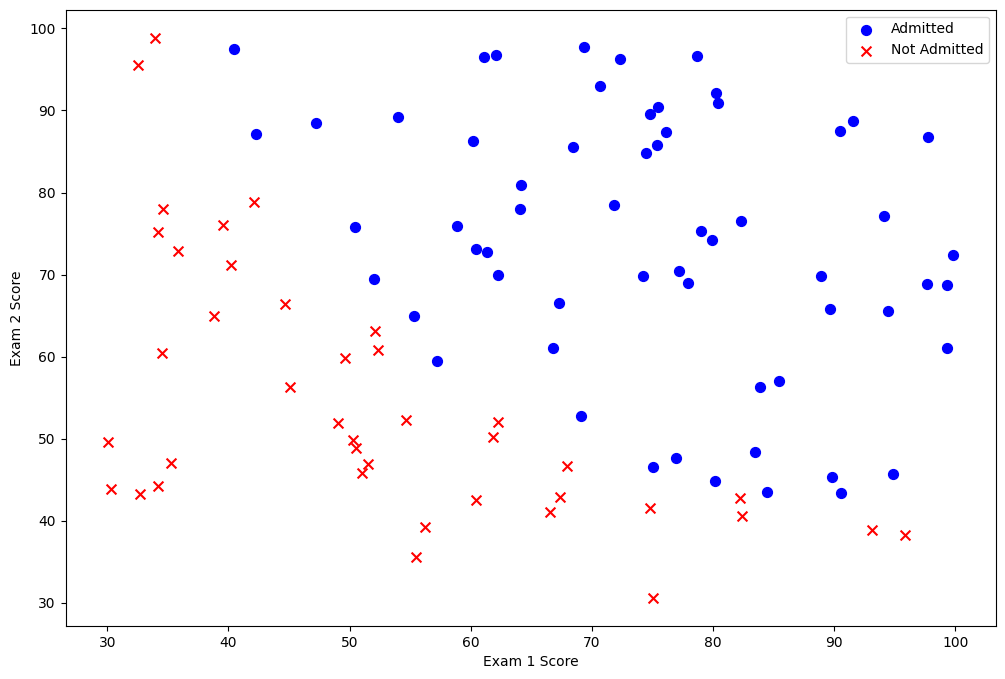

In [16]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

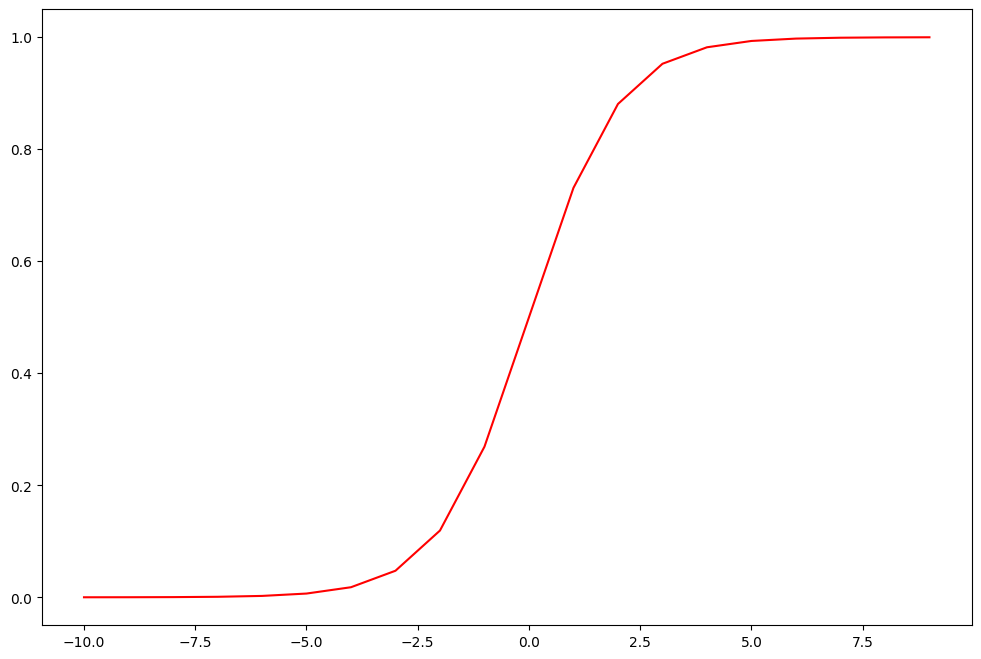

In [22]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [25]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [27]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [29]:
cost(theta, X, y)

0.6931471805599453

In [30]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [31]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [34]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631536E-01   7.89087138E-01
    2    5  5.892425222593011E-01   7.39226590E+01
    3    7  4.227824082768085E-01   1.85265802E+01
    4    9  4.072926971534283E-01   1.68671130E+01
    5   11  3.818854920309407E-01   1.07735097E+01
    6   13  3.786234896709935E-01   2.31584926E+01
tnc: stepmx = 1000
    7   16  2.389268303582261E-01   3.00822039E+00
    8   18  2.047203891858869E-01   1.52227714E-01
    9   20  2.046713899360368E-01   6.62495142E-02
   10   22  2.035303163190396E-01   9.30780772E-04
tnc: fscale = 32.7775
   11   24  2.035293522100511E-01   8.07207683E-06
   12   26  2.035251114039714E-01   1.80213850E-04
   13   28  2.034984103693545E-01   5.02836184E-04
   14   30  2.034978377466289E-01   9.88454531E-06
   15   32  2.034977904843622E-01   3.76915430E-06
   16   34  2.034977386092095E-01   1.93988086E-05
   17   36  2.034977015894744E-01   2.42606408E-13


(array([-25.16131867,   0.20623159,   0.20147149]), 36, 0)

In [38]:
cost(result[0], X, y)

0.2034977015894744

In [39]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [42]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print(f'accuracy = {accuracy}%')

accuracy = 89%
